# CS502 Final Project

### Group Member: Lei Guo, Mengzhi Cao, Zhiyi Huang, Chuchen Dai, Yi Yang

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import prettytable
import time
from sklearn.metrics import confusion_matrix
%matplotlib inline

## 1. Data Visualization

In [3]:
pokemon = pd.read_csv('pokemon.csv')

del pokemon['Generation']
del pokemon['Legendary']

pokemon.loc[pokemon['Type 2'].isnull(),'Type 2'] = pokemon[pokemon['Type 2'].isnull()]['Type 1']
dummy1 = pd.get_dummies(pokemon.loc[:,'Type 1'])
dummy2 = pd.get_dummies(pokemon.loc[:,'Type 2'])

In [4]:
combats = pd.read_csv('combats.csv')

combats_array = np.array(combats)
for i in range(combats_array.shape[0]):
    for j in range(combats_array.shape[1]):
        if combats_array[i][2] == combats_array[i][0]:
            combats_array[i][2] = 0
        elif combats_array[i][2] == combats_array[i][1]:
             combats_array[i][2] = 1

combats = pd.DataFrame(data = combats_array, index = np.arange(1, 50001), columns = np.arange(1, 4))
label = combats[3]

In [5]:
Type_table = np.zeros((18, 18))
Type_table[0,:] = [1,1,1,1,1,0.5,1,0,0.5,1,1,1,1,1,1,1,1,1]
Type_table[1,:] = [2,1,0.5,0.5,1,2,0.5,0,2,1,1,1,1,0.5,2,1,2,0.5]
Type_table[2,:] = [1,2,1,1,1,0.5,2,1,0.5,1,1,2,0.5,1,1,1,1,1]
Type_table[3,:] = [1,1,1,0.5,0.5,0.5,1,0.5,0,1,1,2,1,1,1,1,1,2]
Type_table[4,:] = [1,1,0,2,1,2,0.5,1,2,2,1,0.5,2,1,1,1,1,1]
Type_table[5,:] = [1,0.5,2,1,0.5,1,2,1,0.5,2,1,1,1,1,2,1,1,1]
Type_table[6,:] = [1,0.5,0.5,0.5,1,1,1,0.5,0.5,0.5,1,2,1,2,1,1,2,0.5]
Type_table[7,:] = [0,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,0.5,1]
Type_table[8,:] = [1,1,1,1,1,2,1,1,0.5,0.5,0.5,1,0.5,1,2,1,1,2]
Type_table[9,:] = [1,1,1,1,1,0.5,2,1,2,0.5,0.5,2,1,1,2,0.5,1,1]
Type_table[10,:] = [1,1,1,1,2,2,1,1,1,2,0.5,0.5,1,1,1,0.5,1,1]
Type_table[11,:] = [1,1,0.5,0.5,2,2,0.5,1,0.5,0.5,2,0.5,1,1,1,0.5,1,1]
Type_table[12,:] = [1,1,2,1,0,1,1,1,1,1,2,0.5,0.5,1,1,0.5,1,1]
Type_table[13,:] = [1,2,1,2,1,1,1,1,0.5,1,1,1,1,0.5,1,1,0,1]
Type_table[14,:] = [1,1,2,1,2,1,1,1,0.5,0.5,0.5,2,1,1,0.5,2,1,1]
Type_table[15,:] = [1,1,1,1,1,1,1,1,0.5,1,1,1,1,1,1,2,1,0]
Type_table[16,:] = [1,0.5,1,1,1,1,1,2,1,1,1,1,1,2,1,1,0.5,0.5]
Type_table[17,:] = [1,2,1,0.5,1,1,1,1,0.5,0.5,1,1,1,1,1,2,2,1]
Type_table = pd.DataFrame(Type_table)

### Pikachu

In [6]:
pokemon.loc[pokemon['Name']=='Pikachu']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
30,31,Pikachu,Electric,Electric,35,55,40,50,50,90


In [7]:
labels = np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
stats = pokemon.loc[30,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats = np.concatenate((stats,[stats[0]]))
angles = np.concatenate((angles,[angles[0]]))

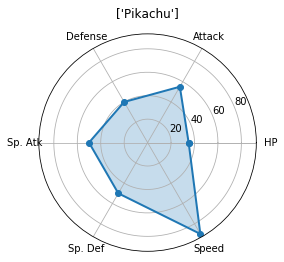

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title([pokemon.loc[30,"Name"]])
ax.grid(True)

### Squirtle

In [9]:
pokemon.loc[pokemon['Name']=='Squirtle']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
9,10,Squirtle,Water,Water,44,48,65,50,64,43


In [10]:
labels = np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
stats = pokemon.loc[9,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats = np.concatenate((stats,[stats[0]]))
angles = np.concatenate((angles,[angles[0]]))

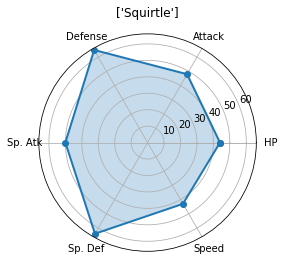

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title([pokemon.loc[9,"Name"]])
ax.grid(True)

## 2. Feature Engineering

In [12]:
def type_result(BA, Pokemon_table, Type1, Type2, index_1, index_2):
    Pokemon1 = Pokemon_table.loc[index_1-1]
    Pokemon2 = Pokemon_table.loc[index_2-1]

    pokemon_1_type1 = Type1.loc[index_1-1].values
    pokemon_1_type2 = Type2.loc[index_1-1].values
    pokemon_2_type1 = Type1.loc[index_2-1].values
    pokemon_2_type2 = Type2.loc[index_2-1].values

    pokemon_1 = np.vstack([pokemon_1_type1,pokemon_1_type2])
    pokemon_2 = np.vstack([pokemon_2_type1,pokemon_2_type2])

    ATdivDF1 = Pokemon1['Attack'] / Pokemon2['Defense']
    ATdivDF2 = Pokemon2['Attack'] / Pokemon1['Defense']
    SATdivSDF1 = Pokemon1['Sp. Atk'] / Pokemon2['Sp. Def']
    SATdivSDF2 = Pokemon2['Sp. Atk'] / Pokemon1['Sp. Def']
    Speed = np.sign(Pokemon1['Speed'] - Pokemon2['Speed'])
    HPsub = Pokemon1['HP'] - Pokemon2['HP']

    result1 = (pokemon_1.dot(BA)).dot(pokemon_2.T)
    result2 = (pokemon_2.dot(BA)).dot(pokemon_1.T)

    result_1 = result1[:,0] * result1[:,1]
    result_2 = result2[:,0] * result2[:,1]
    
    result1 = result_1.max()
    result2 = result_2.max()

    return [HPsub, ATdivDF1, ATdivDF2, SATdivSDF1, SATdivSDF2, Speed, result1, result2]

In [13]:
%%time
y = []
for index in combats.itertuples():
    x = type_result(Type_table, pokemon, dummy1, dummy2, index[1], index[2])
    y = np.hstack([y,x])
y = np.reshape(y,(50000,8))

CPU times: user 57.2 s, sys: 4.1 s, total: 1min 1s
Wall time: 1min 4s


## 4.Algorithm

In [14]:
from sklearn.metrics import classification_report,accuracy_score,roc_curve, auc,f1_score
from datetime import datetime

In [15]:
X_train = y[:40000,:]
y_train = label.loc[:40000]
X_test = y[40000:50000,:]
y_test = label.loc[40001:50000]

In [16]:
def plot_roc(labels, predict_prob):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')

In [17]:
def getreport(y_test,y_predict,y_pred_prob):
    print("Accuracy : ", accuracy_score(y_test,y_predict)*100) 
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("AUC : ",auc(false_positive_rate, true_positive_rate))
    print("F1 score:",f1_score(y_test, y_predict, average='micro')) 
    print("----------")
    print("Report : ")
    print(classification_report(y_test, y_predict)) 

In [18]:
def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black",fontsize=14)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### 4.1 Logistic Regression

#### 4.1.1 Result

In [28]:
from sklearn.linear_model import LogisticRegressionCV
start = datetime.now()
clf = LogisticRegressionCV(cv=5,random_state=0, multi_class='multinomial')
clf.fit(X_train, y_train)
end = datetime.now()
y_predict = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
print('time consumed: {}'.format(end-start))

time consumed: 0:00:05.891594


#### 4.1.2 Confusion Matrix

Confusion matrix, without normalization
[[4543  231]
 [ 406 4820]]
Normalized confusion matrix
[[0.95 0.05]
 [0.08 0.92]]


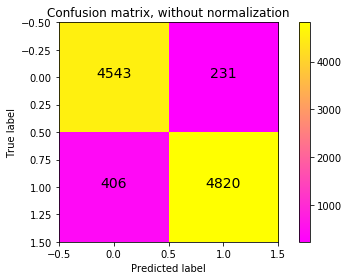

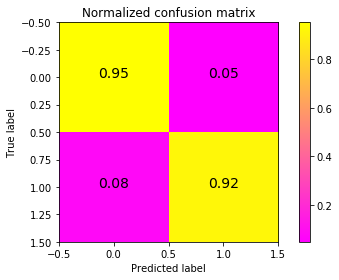

In [30]:
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix, without normalization',cmap=plt.cm.spring)

plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix',cmap=plt.cm.spring)

plt.show();

In [31]:
getreport(y_test,y_predict,y_pred_prob)

Accuracy :  93.63
AUC :  0.9664598361035531
F1 score: 0.9363
----------
Report : 
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      4774
           1       0.95      0.92      0.94      5226

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



#### 4.1.3 ROC Curve

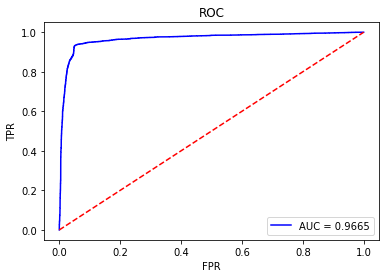

In [32]:
plot_roc(y_test, y_pred_prob[:,1])

### 4.2 Naive Bayes

#### 4.2.1 Result

In [46]:
from sklearn.naive_bayes import GaussianNB
start = datetime.now()
clf = GaussianNB()
clf.fit(X_train, y_train)
end = datetime.now()
y_predict = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
print('time consumed: {}'.format(end-start))

time consumed: 0:00:00.014483


#### 4.2.2 Confusion Matrix

Confusion matrix, without normalization
[[4502  272]
 [ 422 4804]]
Normalized confusion matrix
[[0.94 0.06]
 [0.08 0.92]]


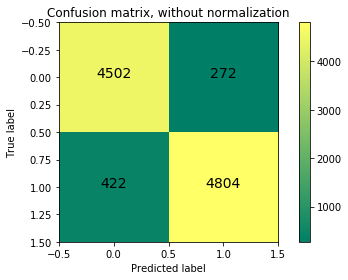

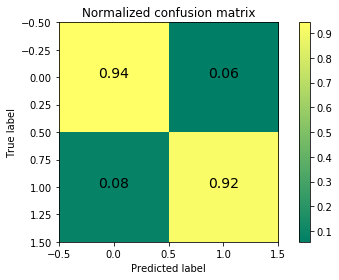

In [47]:
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix, without normalization',cmap=plt.cm.summer)

plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix',cmap=plt.cm.summer)

plt.show();

In [48]:
getreport(y_test,y_predict,y_pred_prob)

Accuracy :  93.06
AUC :  0.9531659962569927
F1 score: 0.9306
----------
Report : 
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4774
           1       0.95      0.92      0.93      5226

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



#### 4.2.3 ROC Curve

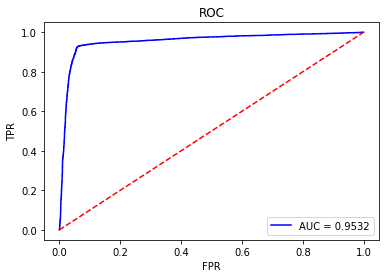

In [39]:
plot_roc(y_test, y_pred_prob[:,1])

### 4.3 Support Vector Machine

#### 4.3.1 Result

In [41]:
from sklearn import svm
start = datetime.now()
clf = svm.SVC(random_state=0, kernel='rbf', probability=True)
clf.fit(X_train, y_train)
end = datetime.now()
y_predict = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
print('time consumed: {}'.format(end-start))

/Users/zoey/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


time consumed: 0:03:14.221710


#### 4.3.2 Confusion Matrix

Confusion matrix, without normalization
[[4539  235]
 [ 378 4848]]
Normalized confusion matrix
[[0.95 0.05]
 [0.07 0.93]]


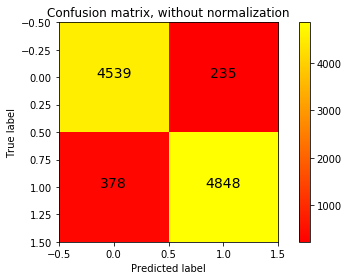

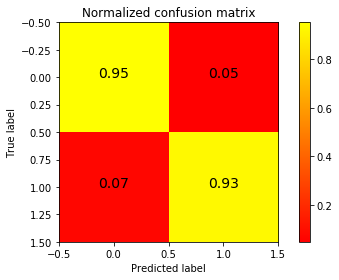

In [43]:
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix, without normalization',cmap=plt.cm.autumn)

plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix',cmap=plt.cm.autumn)

plt.show();

In [44]:
getreport(y_test,y_predict,y_pred_prob)

Accuracy :  93.87
AUC :  0.9585110764696705
F1 score: 0.9387
----------
Report : 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      4774
           1       0.95      0.93      0.94      5226

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



#### 4.3.3 ROC Curve

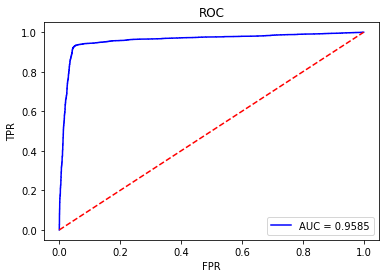

In [45]:
plot_roc(y_test, y_pred_prob[:,1])

### 4.4 Decision Tree

#### 4.4.1 Result

In [62]:
from sklearn import tree
start = datetime.now()
clf = tree.DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)
end = datetime.now()
y_predict = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
print('time consumed: {}'.format(end-start))

time consumed: 0:00:00.078322


#### 4.4.2 Confusion Matrix

Confusion matrix, without normalization
[[4543  231]
 [ 353 4873]]
Normalized confusion matrix
[[0.95 0.05]
 [0.07 0.93]]


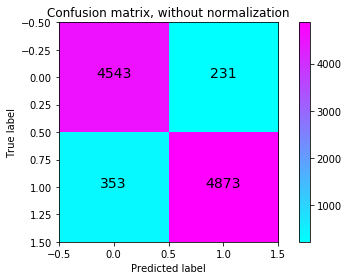

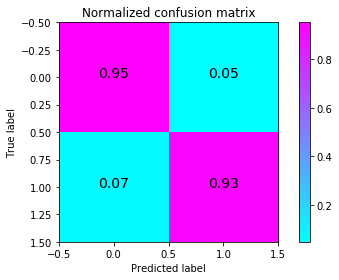

In [51]:
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix, without normalization',cmap=plt.cm.cool)

plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix',cmap=plt.cm.cool)

plt.show();

In [54]:
getreport(y_test,y_predict,y_pred_prob)

Accuracy :  94.16
AUC :  0.9664185717989281
F1 score: 0.9416
----------
Report : 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4774
           1       0.95      0.93      0.94      5226

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



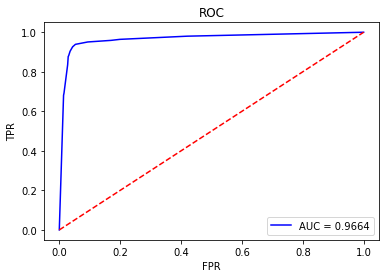

In [53]:
plot_roc(y_test, y_pred_prob[:,1])

#### 4.4.3 Plot

In [55]:
import graphviz
data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)  
graphviz.Source(data)

ModuleNotFoundError: No module named 'graphviz'

### 4.5 KNN

#### 4.5.1 Scale Data

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scale = scaler.fit_transform(y[:40000,:])
test_scale = scaler.fit_transform(y[40000:50000,:])


#### 4.5.2 Result

In [57]:
from sklearn.neighbors import KNeighborsClassifier
start = datetime.now()
clf = KNeighborsClassifier()
clf.fit(train_scale, y_train)
end = datetime.now()
y_predict = clf.predict(test_scale)
y_pred_prob = clf.predict_proba(test_scale)
print('time consumed: {}'.format(end-start))

time consumed: 0:00:00.365378


#### 4.5.3 Confusion Matrix 

Confusion matrix, without normalization
[[4497  277]
 [ 339 4887]]
Normalized confusion matrix
[[0.94 0.06]
 [0.06 0.94]]


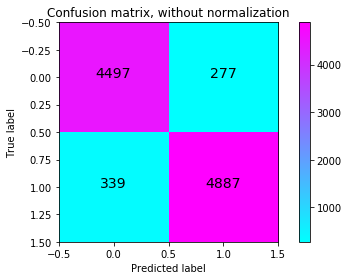

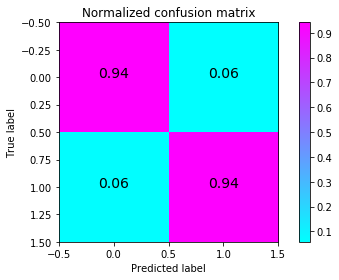

In [58]:
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix, without normalization',cmap=plt.cm.cool)

plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix',cmap=plt.cm.cool)

plt.show();

In [59]:
getreport(y_test,y_predict,y_pred_prob)

Accuracy :  93.84
AUC :  0.9600886595349764
F1 score: 0.9384
----------
Report : 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4774
           1       0.95      0.94      0.94      5226

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



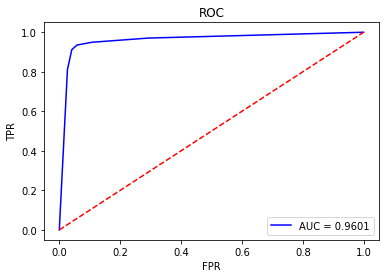

In [60]:
plot_roc(y_test, y_pred_prob[:,1])

### 4.6 Random Forest

#### 4.6.1 Result

In [63]:
from sklearn.ensemble import RandomForestClassifier
start = datetime.now()
clf = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=30)
clf.fit(X_train, y_train)
end = datetime.now()
y_predict = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
print('time consumed: {}'.format(end-start))

time consumed: 0:00:03.975817


#### 4.6.2 Confusion Matrix

Confusion matrix, without normalization
[[4571  203]
 [ 314 4912]]
Normalized confusion matrix
[[0.96 0.04]
 [0.06 0.94]]


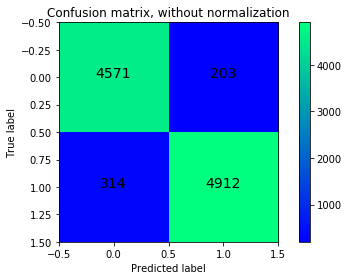

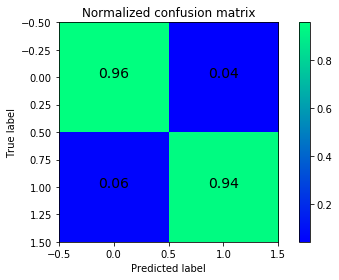

In [65]:
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix, without normalization',cmap=plt.cm.winter)

plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix',cmap=plt.cm.winter)

plt.show();

In [66]:
getreport(y_test,y_predict,y_pred_prob)

Accuracy :  94.83
AUC :  0.9777831300460091
F1 score: 0.9483
----------
Report : 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4774
           1       0.96      0.94      0.95      5226

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



#### 4.6.3 ROC Curve

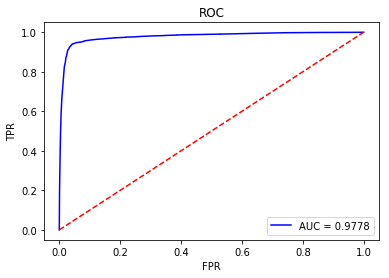

In [67]:
plot_roc(y_test, y_pred_prob[:,1])

### 4.7 Adaboost

#### 4.7.1 Result

In [20]:
from sklearn.ensemble import AdaBoostClassifier
start = datetime.now()
clf = AdaBoostClassifier(random_state=0, n_estimators=100)
clf.fit(X_train, y_train)
end = datetime.now()
y_predict = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
print('time consumed: {}'.format(end-start))

time consumed: 0:00:02.311698


#### 4.7.2 Confusion Matrix

Confusion matrix, without normalization
[[4541  233]
 [ 342 4884]]
Normalized confusion matrix
[[0.95 0.05]
 [0.07 0.93]]


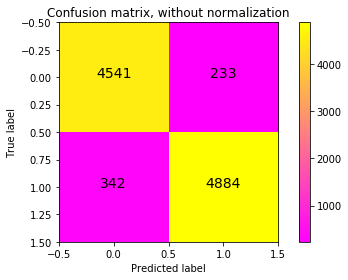

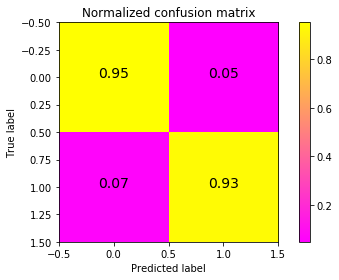

In [22]:
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix, without normalization',cmap=plt.cm.spring)

plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix',cmap=plt.cm.spring)

plt.show();

In [23]:
getreport(y_test,y_predict,y_pred_prob)

Accuracy :  94.25
AUC :  0.9707020831840284
F1 score: 0.9425
----------
Report : 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4774
           1       0.95      0.93      0.94      5226

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



#### 4.7.3 ROC Curve

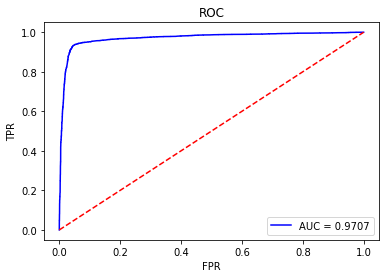

In [24]:
plot_roc(y_test, y_pred_prob[:,1])